In [312]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn import metrics
import xgboost as xg

In [313]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [314]:
df_train = pd.read_csv("/content/gdrive/MyDrive/Technocolabs/Train.csv")

In [315]:
df_test = pd.read_csv("/content/gdrive/MyDrive/Technocolabs/Test.csv")

In [316]:
#shape of the dataset
df_train.shape

(8523, 12)

In [317]:
df_test.shape

(5681, 11)

In [318]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [319]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [320]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Handling Missing Values

In [321]:
missing_values = df_train.isnull().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [322]:
#Percentage of missing data
total_cells = np.product(df_train.shape)
total_missing = missing_values.sum()

percent_missing = (total_missing/total_cells) * 100
print("Percentage of missing data:", round(percent_missing, 3), "%")

Percentage of missing data: 3.787 %


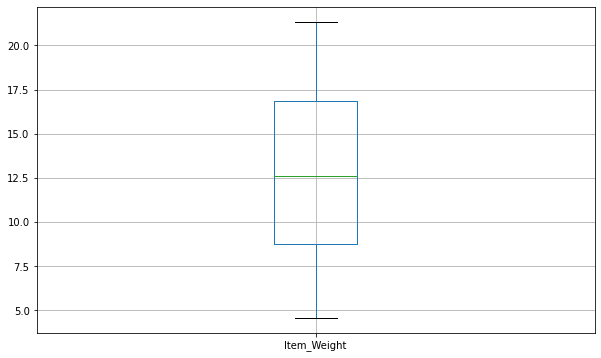

In [323]:
df_train.boxplot(column = ['Item_Weight'], figsize = (10,6))

In [324]:
#dropping rows which contains one or more missing values
df_dup = df_train.dropna()
df_dup.shape

(4650, 12)

Simple dropping the rows with missing values is not efficient in this case as we end up with almost half of the origial data.                   

*   Original Rows: 8523
*   After dropping: 4650

Hence, we will try imputation technique for the missing values. 

In [325]:
itemWeight_mean = df_train["Item_Weight"].mean()
outletSize_mode = df_train["Outlet_Size"].mode().values[0]

In [326]:
df_train["Item_Weight"].replace(np.nan, itemWeight_mean, inplace = True)
df_train["Outlet_Size"].replace(np.nan, outletSize_mode, inplace = True)

In [327]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

For Test Set

In [328]:
missing_values_test = df_test.isnull().sum()
missing_values_test

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [329]:
itemWeight_mean_test = df_test["Item_Weight"].mean()
outletSize_mode_test = df_test["Outlet_Size"].mode().values[0]

In [330]:
df_test["Item_Weight"].replace(np.nan, itemWeight_mean_test, inplace = True)
df_test["Outlet_Size"].replace(np.nan, outletSize_mode_test, inplace = True)

In [331]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

#Checking for duplicate records

In [332]:
#Checking for train set
duplicates_train = df_train.duplicated()
print(duplicates_train.sum())

0


In [333]:
#Checking for test set
duplicates_test = df_test.duplicated()
print(duplicates_test.sum())

0


#Checking for outliers

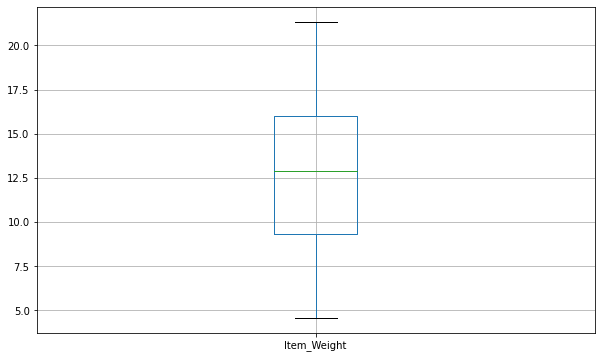

In [334]:
#Boxplot for item Weight attribute to check for outliers
df_train.boxplot(column = ["Item_Weight"], figsize = (10,6))

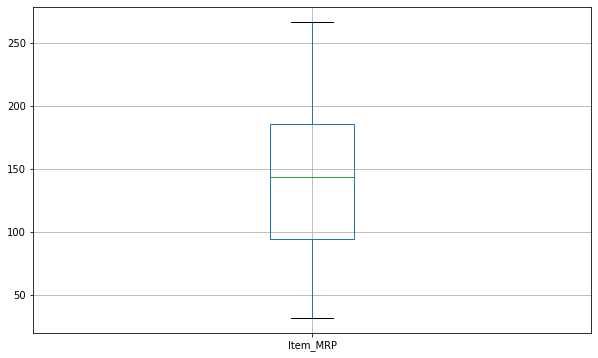

In [335]:
#Boxplot for Item MRP(Maximum Retail Price) attribute to check for outliers
df_train.boxplot(column = ["Item_MRP"], figsize = (10,6))

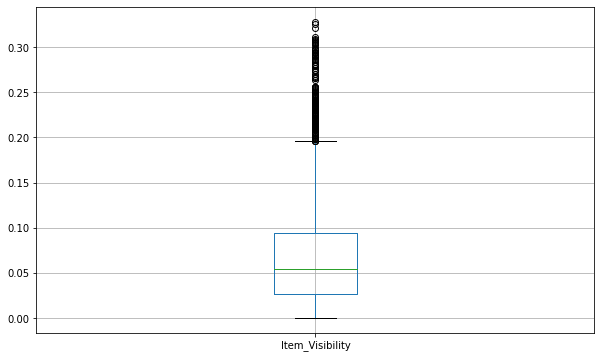

In [336]:
#Boxplot for item visibility attribute to check for outliers
df_train.boxplot(column = ["Item_Visibility"], figsize = (10,6))

In [337]:
#function to remove outliers
def remove_outliers(column):
  sorted(column)
  Q1, Q3 = column.quantile([0.25, 0.75])
  IQR = Q3 -Q1
  lower = Q1 - (1.5 * IQR)
  upper = Q3 + (1.5 * IQR)
  return lower, upper

In [338]:
lowV, highV = remove_outliers(df_train["Item_Visibility"])
df_train["Item_Visibility"] = np.where(df_train["Item_Visibility"] > highV, highV, df_train["Item_Visibility"])

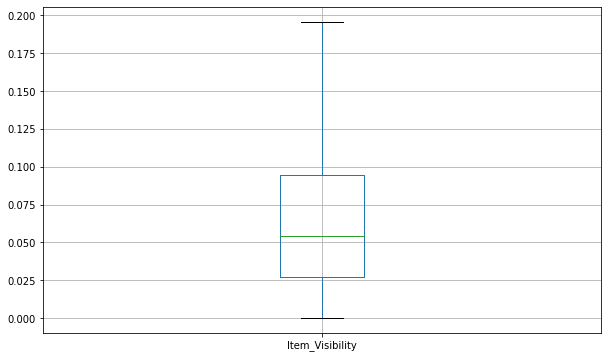

In [339]:
#Boxplot for item visibility after removing outliers 
df_train.boxplot(column = ["Item_Visibility"], figsize = (10,6))


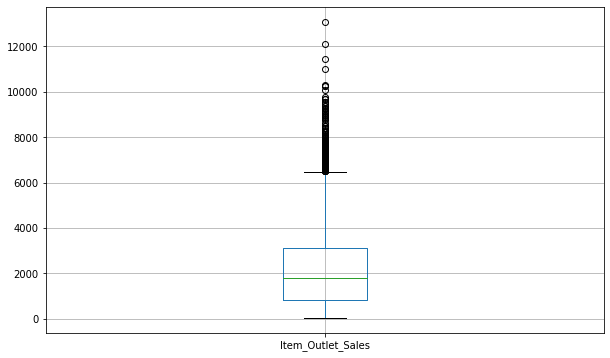

In [340]:
#Boxplot for item Outlet Sales attribute to check for outliers
df_train.boxplot(column = ["Item_Outlet_Sales"], figsize = (10,6))

In [341]:
#lowS, highS = remove_outliers(df_train["Item_Outlet_Sales"])
#df_train["Item_Outlet_Sales"] = np.where(df_train["Item_Outlet_Sales"] > highS, highS, df_train["Item_Outlet_Sales"])

In [342]:
#Boxplot for item Outlet Sales attribute after removing outliers
#df_train.boxplot(column = ["Item_Outlet_Sales"], figsize = (10,6))

For Test Set

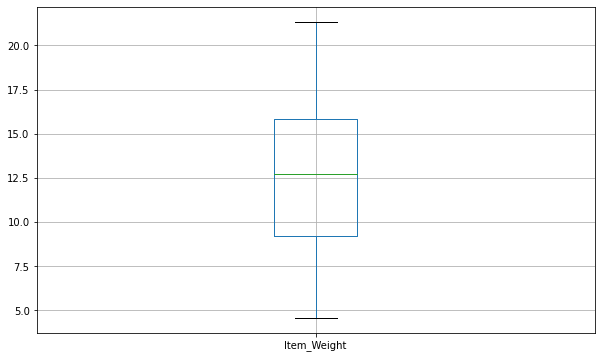

In [343]:
#Boxplot for item Weight attribute to check for outliers
df_test.boxplot(column = ["Item_Weight"], figsize = (10,6))

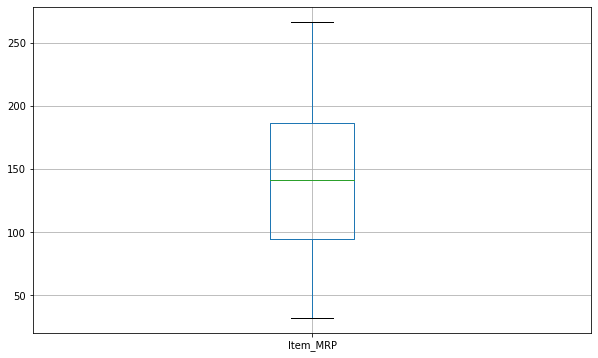

In [344]:
#Boxplot for Item MRP(Maximum Retail Price) attribute to check for outliers
df_test.boxplot(column = ["Item_MRP"], figsize = (10,6))

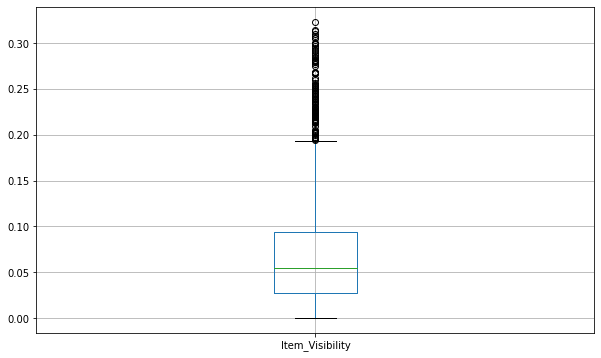

In [345]:
#Boxplot for item visibility attribute to check for outliers
df_test.boxplot(column = ["Item_Visibility"], figsize = (10,6))

In [346]:
lowV_test, highV_test = remove_outliers(df_test["Item_Visibility"])
df_test["Item_Visibility"] = np.where(df_test["Item_Visibility"] > highV_test, highV_test, df_test["Item_Visibility"])

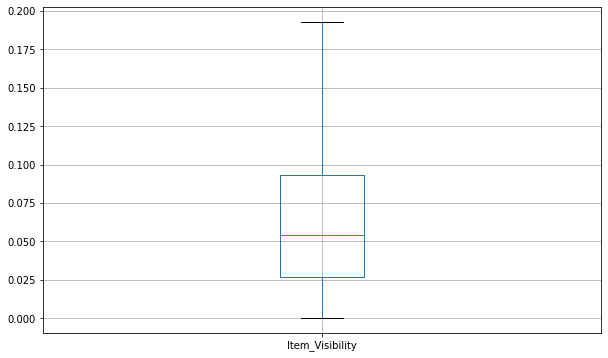

In [347]:
#Boxplot for item visibility attribute after removing outliers
df_test.boxplot(column = ["Item_Visibility"], figsize = (10,6))

In [120]:
#knn model
#training data: complete columns 
#label: columns with missing values (Outlet_size)  

#Bivariate Analysis

In [348]:
df_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011928,0.024756,-0.008301,0.011550
Item_Visibility,-0.011928,1.000000,-0.001163,-0.064105,-0.117918
Item_MRP,0.024756,-0.001163,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.064105,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.117918,0.567574,-0.049135,1.000000


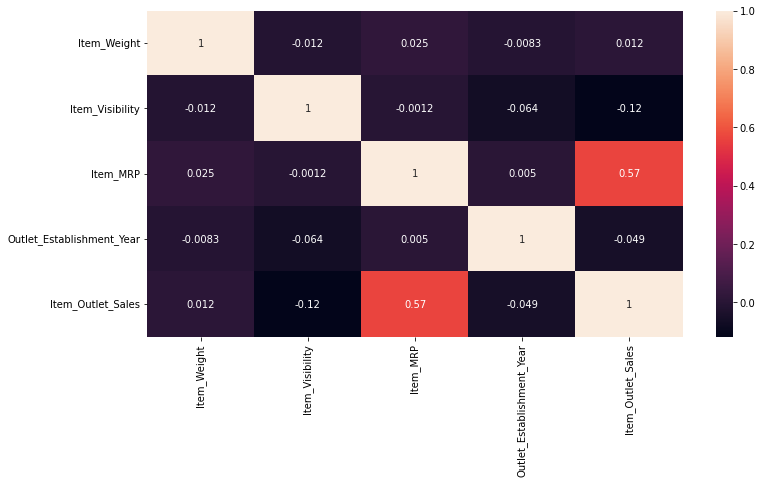

In [349]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), annot = True)


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

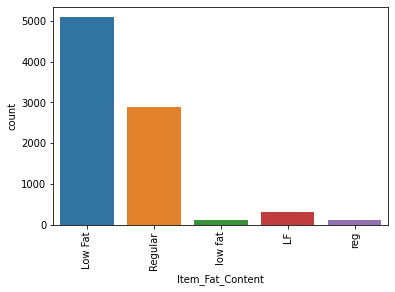

In [350]:
sns.countplot(x='Item_Fat_Content', data = df_train)
plt.xticks(rotation=90)

From the above graph we can see that for the attribute Item Fat Content there are only two labels that Low Fat and regular, and therefore we will combine "low fat" and "LF" with "Low Fat" and "reg" with "Regular"

In [351]:
df_train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [352]:
df_train["Item_Fat_Content"] = np.where(df_train["Item_Fat_Content"] == 'low fat', "Low Fat", df_train["Item_Fat_Content"])
df_train["Item_Fat_Content"] = np.where(df_train["Item_Fat_Content"] == 'LF', "Low Fat", df_train["Item_Fat_Content"])
df_train["Item_Fat_Content"] = np.where(df_train["Item_Fat_Content"] == 'reg', "Regular", df_train["Item_Fat_Content"])


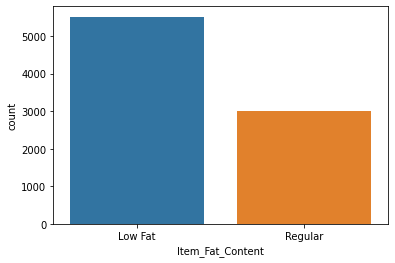

In [353]:
sns.countplot(x='Item_Fat_Content', data = df_train)


For test

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

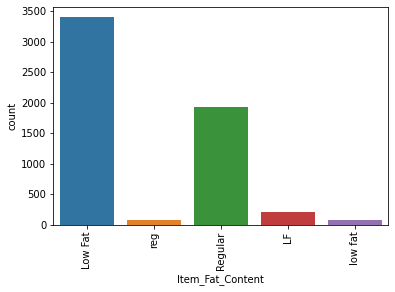

In [354]:
sns.countplot(x='Item_Fat_Content', data = df_test)
plt.xticks(rotation=90)

In [355]:
df_test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [356]:
df_test["Item_Fat_Content"] = np.where(df_test["Item_Fat_Content"] == 'low fat', "Low Fat", df_test["Item_Fat_Content"])
df_test["Item_Fat_Content"] = np.where(df_test["Item_Fat_Content"] == 'LF', "Low Fat", df_test["Item_Fat_Content"])
df_test["Item_Fat_Content"] = np.where(df_test["Item_Fat_Content"] == 'reg', "Regular", df_test["Item_Fat_Content"])

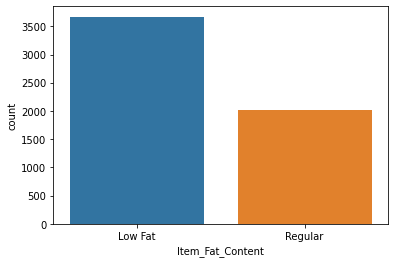

In [357]:
sns.countplot(x='Item_Fat_Content', data = df_test)


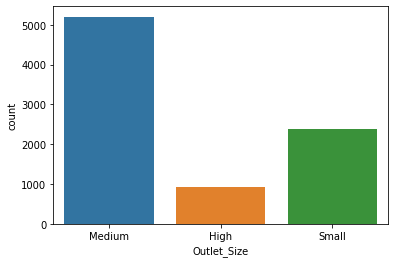

In [358]:
sns.countplot(x='Outlet_Size', data = df_train)

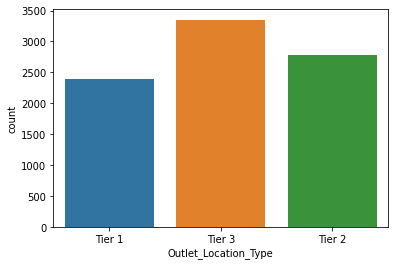

In [359]:
sns.countplot(x='Outlet_Location_Type', data = df_train)


In [360]:
df_train["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

Text(0, 0.5, 'Item Outlet Sales')

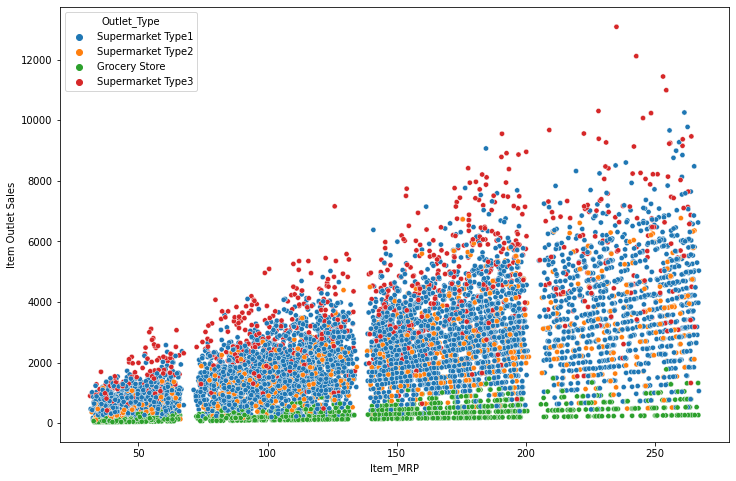

In [361]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.scatterplot(x = df_train["Item_MRP"], y = df_train["Item_Outlet_Sales"], hue = df_train["Outlet_Type"], s = 27)
plt.xlabel("Item_MRP")
plt.ylabel("Item Outlet Sales")

Text(0.5, 1.0, 'Item Outlet Sales vs. Outlet Type')

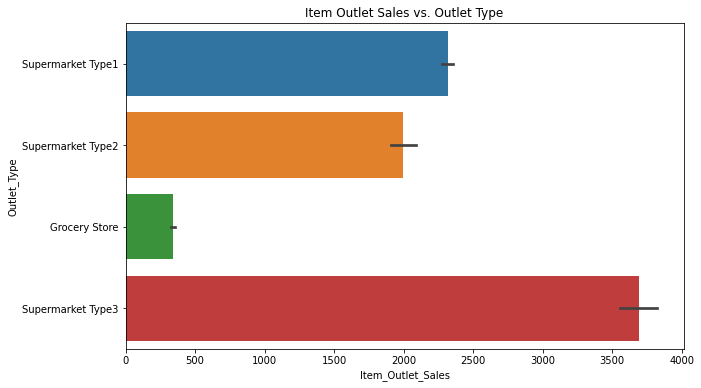

In [362]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Item_Outlet_Sales", y = "Outlet_Type", data = df_train)
plt.title("Item Outlet Sales vs. Outlet Type")

Text(0.5, 1.0, 'Item Outlet Sales vs. Outlet Loction Type')

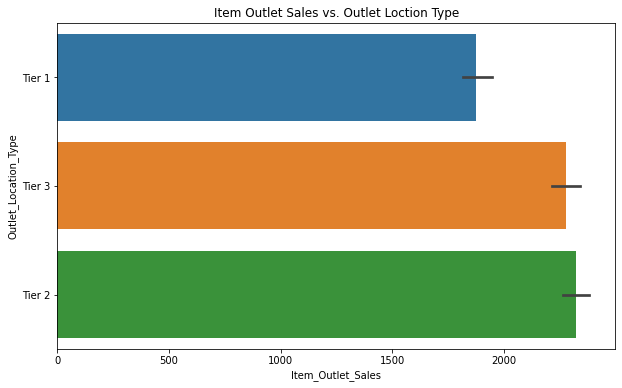

In [363]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Item_Outlet_Sales", y = "Outlet_Location_Type", data = df_train)
plt.title("Item Outlet Sales vs. Outlet Loction Type")

Text(0.5, 1.0, 'Item Outlet Sales vs. Outlet Size')

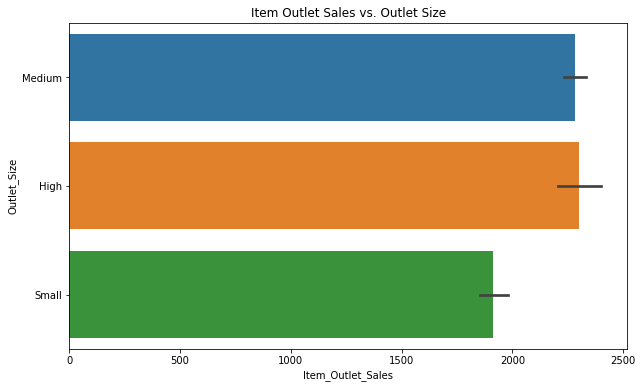

In [364]:
plt.figure(figsize=(10,6))
sns.barplot(x = "Item_Outlet_Sales", y = "Outlet_Size", data = df_train)
plt.title("Item Outlet Sales vs. Outlet Size")

#Encoding categorical varibales into numerical variables (One Hot Encoding)

In [140]:
# cols = ['Item_Identifier', 'Item_Fat_Content',
#        'Item_Type', 'Outlet_Identifier','Outlet_Size',
#        'Outlet_Location_Type',
#        'Outlet_Type']

# dummies = pd.get_dummies(df_train[cols], columns = cols, drop_first = True)
# df_train = pd.concat([df_train, dummies], axis = 1 )
# df_train.drop(cols, axis = 1, inplace = True)

In [365]:
cols = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier','Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type']

# cols = ['Item_Identifier', 'Item_Fat_Content',
#        'Item_Type', 'Outlet_Identifier',
#        'Outlet_Location_Type',
#        'Outlet_Type']       

In [366]:
encoders_dict={}
for each in cols:
  le = preprocessing.LabelEncoder()
  le.fit(df_train[each])
  encoders_dict[each]=le
  df_train[each] = le.transform(df_train[each])

In [367]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300000,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920000,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500000,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200000,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930000,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
5,758,10.395000,1,0.000000,0,51.4008,3,2009,1,2,2,556.6088
6,696,13.650000,1,0.012741,13,57.6588,1,1987,0,2,1,343.5528
7,738,12.857645,0,0.127470,13,107.7622,5,1985,1,2,3,4022.7636
8,440,16.200000,1,0.016687,5,96.9726,7,2002,1,1,1,1076.5986
9,990,19.200000,1,0.094450,5,187.8214,2,2007,1,1,1,4710.5350


For Test Set

In [368]:
cols = ['Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier','Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type']

for each in cols:
  le = encoders_dict[each]
  #le.fit(df_test[each])
  df_test[each] = le.transform(df_test[each])


In [369]:
df_test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [234]:
#df_train['Outlet_Size'] = new_col

In [371]:
#Dropping Item Identifier column
df_train.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace = True)

In [372]:
df_train.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


In [373]:
df_test.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1, inplace = True)

In [374]:
df_test.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,9,1,0,1
1,8.300000,1,0.038428,4,87.3198,2,1,1,1
2,14.600000,0,0.099575,11,241.7538,0,1,2,0
3,7.315000,0,0.015388,13,155.0340,2,1,1,1
4,12.695633,1,0.118599,4,234.2300,5,1,2,3


#Train Test Split

In [375]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, [-1]]

In [376]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#y = scaler.fit_transform(y)

In [377]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, shuffle = True)

In [378]:
val_y.shape

(1705, 1)

#Fitting a Model

###Linear Regression

In [379]:
model_lr = LinearRegression()
model_lr.fit(train_X, train_y)

y_pred = model_lr.predict(val_X)
#y_val = scaler.inverse_transform(val_y)
#y_pred = scaler.inverse_transform(y_pred)

R2_score = metrics.r2_score(val_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(val_y, y_pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

R2 score 0.5061812374068779
RMSE: 1205.6027768754075


###Random Forest

In [380]:
model_rf = RandomForestRegressor()
model_rf.fit(train_X, train_y)

y_pred = model_rf.predict(val_X)
#y_val = scaler.inverse_transform(val_y)
#y_pred = scaler.inverse_transform(y_pred)

R2_score = metrics.r2_score(val_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(val_y, y_pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 score 0.5694080040201159
RMSE: 1125.7797241595208


###Support Vector Machines

In [381]:
model_svm = SVR()
model_svm.fit(train_X, train_y)

y_pred = model_svm.predict(val_X)

R2_score = metrics.r2_score(val_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(val_y, y_pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score 0.05577572844001988
RMSE: 1667.0860835600458


##KNN

In [382]:
model_knn = KNeighborsRegressor(n_neighbors=12)
model_knn.fit(train_X, train_y)

y_pred = model_knn.predict(val_X)

R2_score = metrics.r2_score(val_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(val_y, y_pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

R2 score 0.5642343112890464
RMSE: 1132.52282105698


###XGBoost (Best Results)

In [383]:
model_xgb = xg.XGBRegressor()
model_xgb.fit(train_X, train_y)

y_pred = model_xgb.predict(val_X)

R2_score = metrics.r2_score(val_y, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(val_y, y_pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

[14:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.6035305690000821
RMSE: 1080.2525494449117


In [ ]:
# pred = model_xgb.predict(train_X)
# R2_score = metrics.r2_score(train_y, pred)
# rmse = np.sqrt(metrics.mean_squared_error(train_y, pred))

# print("R2 score", R2_score)
# print('RMSE:', rmse)

###Hyperparameter Tuning

In [124]:
# model = xg.XGBRegressor(max_depth= 6, learning_rate = 0.3, n_estimators= 300)
# model.fit(train_X, train_y)

# y_pred = model.predict(test_X)

# R2_score = metrics.r2_score(test_y, y_pred)
# rmse = np.sqrt(metrics.mean_squared_error(test_y, y_pred))

# print("R2 score", R2_score)
# print('RMSE:', rmse)

[18:46:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.5359693796963596
RMSE: 1100.160975281108


In [72]:
predictions = model1.predict(test_X)
MSE = mean_squared_error(test_y, predictions)
print(MSE)

1890535.5129338955


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
 
#create a model
model = Sequential([
#    Dense(10),
    Dense(1)
])
#compile the model
model.compile(loss=tf.keras.losses.mse,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mse"]
)
#fit the model
model.fit(train_X, train_y,epochs= 1000)


In [ ]:
model.fit(train_X, train_y,epochs= 1000)


##Final Predictions

In [384]:
test_X = df_test.to_numpy()
test_X = scaler.transform(test_X)
test_pred = model_xgb.predict(test_X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


#Extra

In [165]:
df = pd.read_csv("/content/gdrive/MyDrive/Technocolabs/Train.csv")

In [166]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [167]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [168]:
col_cat = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type',
       'Outlet_Type']

encoders_dict={}
for each in col_cat:
  le = preprocessing.LabelEncoder()
  le.fit(df[each])
  #encoders_dict[each]=le
  df[each] = le.transform(df[each])

In [169]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,NaN,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [171]:
cols = ['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']

train_X = df.loc[df["Outlet_Size"].notnull(), cols].to_numpy()
train_y = df.loc[df['Outlet_Size'].notnull(), "Outlet_Size"].to_numpy()

test_X = df.loc[df['Outlet_Size'].isnull(), cols].to_numpy()
test_y = df.loc[df['Outlet_Size'].isnull(), "Outlet_Size"].to_numpy()

In [172]:
outlet_size_le = preprocessing.LabelEncoder()
outlet_size_le.fit(train_y)
train_y = outlet_size_le.transform(train_y)

In [170]:
df['Outlet_Size'].isnull().sum()

2410

In [173]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(train_X, train_y)

RandomForestClassifier()

In [174]:
pred = model.predict(test_X)

In [187]:
mask = df['Outlet_Size'].isnull()
new_col = []
ind_train=0
ind_test=0
for each in mask:
  if each:
    new_col.append(pred[ind_test])
    ind_test+=1
  else:
    new_col.append(train_y[ind_train])
    ind_train+=1

In [188]:
df['Outlet_Size_new']=new_col

In [189]:
df['Outlet_Size_new']

array([1, 0, 2])

In [175]:
R2_score = metrics.r2_score(test_y, pred)
rmse = np.sqrt(metrics.mean_squared_error(train_y, pred))

print("R2 score", R2_score)
print('RMSE:', rmse)

R2 score 1.0
RMSE: 0.0
